# Clustering

## Image segmentation by K-Means

The objective of this lab is to show how to use K-Means to segment images. 

You will find below the code for segmenting a greyscale image into K images, each with a specific grey level, by K-Means. We refer to each such image as a **mask**.

## To do

* Apply K-Means to each mask (with some appropriate value of K) so as to identify different segments of the original image.<br> Test on various images.
* Adapt the method to color images.


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
from sklearn.cluster import KMeans

## Load images

In [3]:
# load the raccoon image as a numpy array
try:
    face = -scipy.face(gray=True)
except AttributeError:
    from scipy import misc
    face = -misc.face(gray=True)

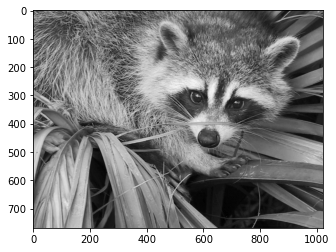

In [26]:
plt.imshow(face, cmap='binary')
plt.show()

In [5]:
img = face[:500,400:900]

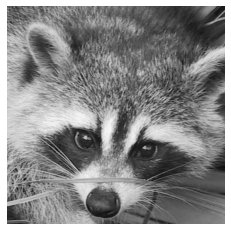

In [6]:
plt.imshow(img,cmap = 'binary')
plt.axis('off')
plt.show()

In [7]:
img.shape

(500, 500)

## Application to greyscale image

In [8]:
k = 4

In [9]:
km = KMeans(n_clusters=k, n_init=5)

In [10]:
# 1D array
X = img.reshape((-1,1))

In [11]:
X.shape

(250000, 1)

In [12]:
X[:10]

array([[183],
       [179],
       [175],
       [169],
       [163],
       [162],
       [170],
       [180],
       [168],
       [174]], dtype=uint8)

In [13]:
km.fit(X)

KMeans(n_clusters=4, n_init=5)

In [14]:
km.cluster_centers_

array([[107.63801704],
       [198.01619297],
       [ 55.1179947 ],
       [154.66637652]])

In [15]:
km.labels_

array([1, 1, 3, ..., 0, 0, 0], dtype=int32)

In [16]:
X_ = km.cluster_centers_[km.labels_]
X_ = X_.astype('uint8')

In [17]:
# selected levels of grey
np.unique(X_)

array([ 55, 107, 154, 198], dtype=uint8)

In [18]:
# new image with k levels of grey
img_ = X_.reshape(img.shape)

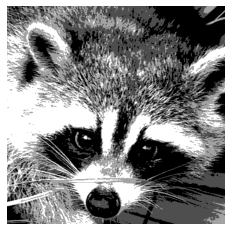

In [19]:
plt.imshow(img_,cmap = 'binary')
plt.axis('off')
plt.show()

In [20]:
def get_masks(img, km):
    masks = []
    for j in range(km.n_clusters):
        X_ = (km.labels_ == j) * km.cluster_centers_[j]
        X_ = X_.astype('uint8')
        masks.append(X_.reshape(img.shape))
    return masks

In [21]:
masks = get_masks(img, km)

In [22]:
def show_masks(masks):
    for img in masks:
        plt.figure()
        plt.imshow(img, cmap = 'binary', vmin = 0, vmax = 255)
        plt.axis('off')
        plt.show()

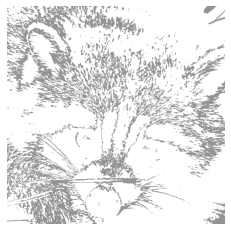

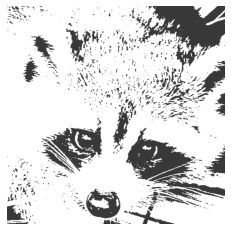

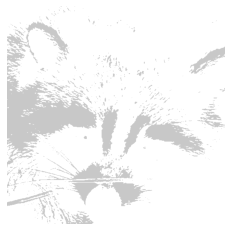

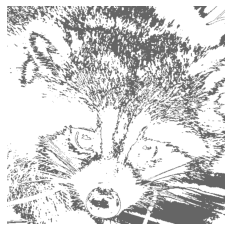

In [23]:
show_masks(masks)

## Application to color picture

In [38]:
import os.path
from urllib.request import urlretrieve as download

In [42]:
filename = 'racoon.jpg'
if not os.path.isfile(filename):
    download('https://www.parcanimalierdauvergne.fr/wp-content/uploads/2019/04/IMG_1563-900x600.jpg', filename)

In [43]:
img = plt.imread('./racoon.jpg')
# 2D array
X = img.reshape(-1,3)

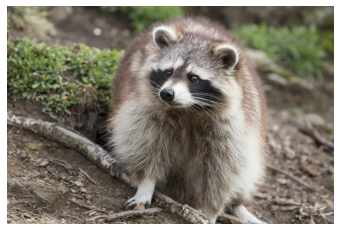

In [44]:
plt.imshow(img)
plt.axis('off')
plt.show()